In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

5.a

In [2]:
def FiveA(nt, mu, phi):
    # Generate constants
    sqrt_nt = np.sqrt(nt)
    err_u = 0
    err_sd = np.sqrt(1 - phi**2)
    asymp_sd = np.sqrt((1+phi)/(1-phi))
    term_1_z = (1/(asymp_sd*sqrt_nt))
    x_0 = np.random.normal(mu, 1)
    # Generate 0 vectors to be populated
    X_i = np.zeros(nt)
    Z_n = np.zeros(nt)
    X_axis = np.zeros(nt)
    # Seed first values for X_i and Z_n
    X_i[0] = x_0
    Z_n[0] = term_1_z*np.sum(X_i)
    
    for i in range(1, nt):
        error = np.random.normal(err_u, err_sd)
        X_i[i] = phi*(X_i[i-1]) + error
        Z_n[i] = term_1_z*np.sum(X_i)
        X_axis[i] = i/nt
    
    return (X_i, Z_n, X_axis)

In [5]:
FiveA_resp = FiveA(100000, 0, 0.9)

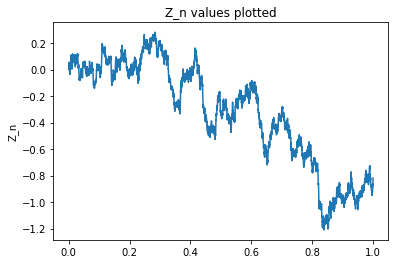

In [6]:
plt.plot(FiveA_resp[2], FiveA_resp[1])
plt.title('Z_n values plotted')
plt.ylabel('Z_n')
plt.savefig('5a.png')
plt.show()

5.b

In [3]:
def Fiveb(reps, n):
    rep_results = np.zeros(reps)
    phi = 0.9
    err_u = 0
    err_sd = np.sqrt(1 - phi**2)
    sqrt_nt = np.sqrt(n/2)
    err_u = 0
    err_sd = np.sqrt(1 - phi**2)
    asymp_sd = np.sqrt((1+phi)/(1-phi))
    term_1_z = (1/(asymp_sd*sqrt_nt))
    for j in range(reps):
        # generating x_i
        x_0 = np.random.normal(0, 1)
        # Generate 0 vectors to be populated
        X_i = np.zeros(int(n/2))
        # Seed first values for X_i
        X_i[0] = x_0
        phi = 0.9
        
        for i in range(int(n/2)):
            error = np.random.normal(err_u, err_sd)
            X_i[i] = phi*(X_i[i-1]) + error
        
        rep_results[j] = term_1_z*np.sum(X_i)
    
    return rep_results

In [10]:
Fiveb_resp = Fiveb(400, 100000)

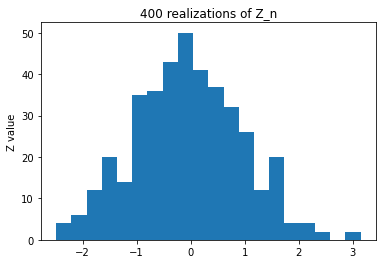

In [14]:
plt.hist(Fiveb_resp, bins=20)
plt.title('400 realizations of Z_n')
plt.ylabel('Z value')
plt.savefig('5b.png')
plt.show()

In [15]:
anderson_b = st.anderson(Fiveb_resp)
print("Test statistic:", anderson_b[0])
print("Critical value at 0.05:", anderson_b[1][2])
if anderson_b[0] < anderson_b[1][2]:
    print("Since the test statistic is below the critical value, we fail to reject H0.")

Test statistic: 0.19181827728380085
Critical value at 0.05: 0.779
Since the test statistic is below the critical value, we fail to reject H0.


6.a

In [38]:
counter=0
for i in range(400):
    sqrt_nt = np.sqrt(10000)
    err_u = 0
    err_sd = np.sqrt(1 - 0.9**2)
    x_0 = np.random.normal(10, 1)
    # Generate 0 vectors to be populated
    X_i = np.zeros(10000)
    # Seed first value for X_i
    X_i[0] = x_0

    for i in range(1, 10000):
        error = np.random.normal(err_u, err_sd)
        X_i[i] = 10 + 0.9*(X_i[i-1]-10) + error
    mean = np.mean(X_i)
    t = (st.t.ppf(.95, 10000-1))*((np.std(X_i))/np.sqrt(10000))
    if mean-t <= 10 <= mean+t:
        counter += 1
counter/400

0.3225

6.b

In [39]:
counter=0
for i in range(400):
    sqrt_nt = np.sqrt(100000)
    err_u = 0
    err_sd = np.sqrt(1 - 0.9**2)
    x_0 = np.random.normal(10, 1)
    # Generate 0 vectors to be populated
    X_i = np.zeros(100000)
    # Seed first value for X_i
    X_i[0] = x_0

    for i in range(1, 100000):
        error = np.random.normal(err_u, err_sd)
        X_i[i] = 10 + 0.9*(X_i[i-1]-10) + error
    mean = np.mean(X_i)
    t = (st.t.ppf(.95, 100000-1))*((np.std(X_i))/np.sqrt(100000))
    if mean-t <= 10 <= mean+t:
        counter += 1
counter/400

0.31

6.c

In [40]:
z = st.norm.ppf(1-.05/2)
std_dev = np.sqrt((1+0.9)/(1-0.9))

counter=0
for i in range(400):
    sqrt_nt = np.sqrt(10000)
    err_u = 0
    err_sd = np.sqrt(1 - 0.9**2)
    x_0 = np.random.normal(10, 1)
    # Generate 0 vectors to be populated
    X_i = np.zeros(10000)
    # Seed first value for X_i
    X_i[0] = x_0

    for i in range(1, 10000):
        error = np.random.normal(err_u, err_sd)
        X_i[i] = 10 + 0.9*(X_i[i-1]-10) + error
    mean = np.mean(X_i)
    z_final = z*(std_dev/np.sqrt(10000))
    if mean-z_final <= 10 <= mean+z_final:
        counter += 1
counter/400

0.9375

7

In [41]:
counter=0
for i in range(400):
    sqrt_nt = np.sqrt(10000)
    err_u = 0
    err_sd = np.sqrt(1 - (-0.9)**2)
    x_0 = np.random.normal(10, 1)
    # Generate 0 vectors to be populated
    X_i = np.zeros(10000)
    # Seed first value for X_i
    X_i[0] = x_0

    for i in range(1, 10000):
        error = np.random.normal(err_u, err_sd)
        X_i[i] = 10 -0.9*(X_i[i-1]-10) + error
    mean = np.mean(X_i)
    t = (st.t.ppf(.95, 10000-1))*((np.std(X_i))/np.sqrt(10000))
    if mean-t <= 10 <= mean+t:
        counter += 1
print(counter/400)

counter=0
for i in range(400):
    sqrt_nt = np.sqrt(100000)
    err_u = 0
    err_sd = np.sqrt(1 - (-0.9)**2)
    x_0 = np.random.normal(10, 1)
    # Generate 0 vectors to be populated
    X_i = np.zeros(100000)
    # Seed first value for X_i
    X_i[0] = x_0

    for i in range(1, 100000):
        error = np.random.normal(err_u, err_sd)
        X_i[i] = 10 -0.9*(X_i[i-1]-10) + error
    mean = np.mean(X_i)
    t = (st.t.ppf(.95, 100000-1))*((np.std(X_i))/np.sqrt(100000))
    if mean-t <= 10 <= mean+t:
        counter += 1
print(counter/400)

1.0
1.0
